In [1]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
flower = load_iris()

In [3]:
dir(flower)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [8]:
import pandas as pd
df = pd.DataFrame(flower.data,columns=flower.feature_names)

In [14]:
df = df.drop(df[['petal length (cm)','petal width (cm)']],axis=1)

In [15]:
df

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [20]:
x = df[['sepal length (cm)']]

In [21]:
y = df[['sepal width (cm)']]

In [28]:
scaler = MinMaxScaler()
scaler.fit(df[['sepal length (cm)']])
df['sepal length (cm)'] = scaler.transform(df[['sepal length (cm)']])

scaler.fit(df[['sepal width (cm)']])
df['sepal width (cm)'] = scaler.transform(df[['sepal width (cm)']])
df

,sepal length (cm),sepal width (cm),cluster
0,0.222222,0.625000,1
1,0.166667,0.416667,1
2,0.111111,0.500000,1
3,0.083333,0.458333,1
4,0.194444,0.666667,1
...,...,...,...
145,0.666667,0.416667,2
146,0.555556,0.208333,0
147,0.611111,0.416667,0
148,0.527778,0.583333,0


In [29]:
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(x,y)
y_pred

C:\Users\Shoba\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Shoba\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 1, 1, 1, 0, 2, 0, 0, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 0, 0, 1, 1, 0, 1, 2, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 2, 0, 2, 2, 2,
       1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2,
       1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1])

In [30]:
df['cluster'] = y_pred
df

,sepal length (cm),sepal width (cm),cluster
0,0.222222,0.625000,0
1,0.166667,0.416667,0
2,0.111111,0.500000,0
3,0.083333,0.458333,0
4,0.194444,0.666667,0
...,...,...,...
145,0.666667,0.416667,2
146,0.555556,0.208333,1
147,0.611111,0.416667,1
148,0.527778,0.583333,1


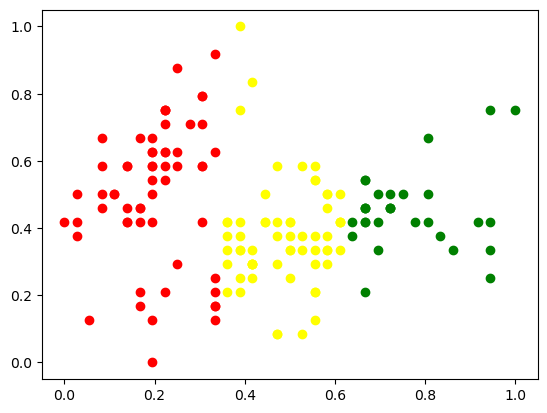

In [33]:
d0 = df[df.cluster==0]
d1 = df[df.cluster==1]
d2 = df[df.cluster==2]
plt.scatter(d0['sepal length (cm)'],d0['sepal width (cm)'],color='red')
plt.scatter(d1['sepal length (cm)'],d1['sepal width (cm)'],color='yellow')
plt.scatter(d2['sepal length (cm)'],d2['sepal width (cm)'],color='green')

In [35]:
# square sum error
sse = []
for i in range(1,10):
    km = KMeans(n_clusters=i)
    km.fit(x,y)
    sse.append(km.inertia_)

C:\Users\Shoba\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Shoba\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Shoba\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Shoba\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

In [36]:
sse

[102.16833333333332,
 30.914493796079853,
 15.816622672964716,
 8.257769230769235,
 5.5615194805194825,
 3.659493706625285,
 2.7569666350411124,
 2.055832339229398,
 1.486202402172989]

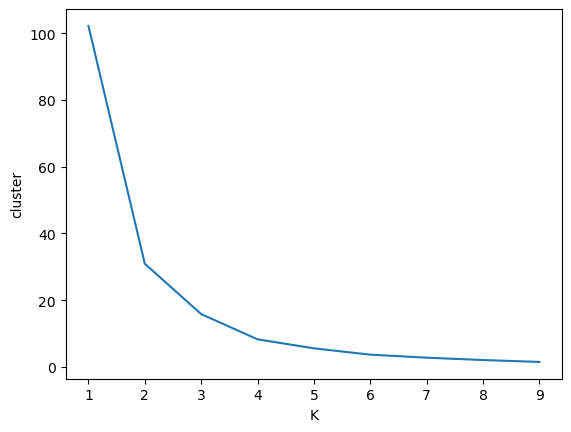

In [37]:
plt.xlabel('K')
plt.ylabel('cluster')
plt.plot(range(1,10),sse)